<a href="https://colab.research.google.com/github/iupui-soic/pybootcamp/blob/main/Raajitha_Chapter1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading Libraries and Dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

data_root = "https://github.com/ageron/data/raw/main/"
lifesat = pd.read_csv(data_root + "lifesat/lifesat.csv")
X = lifesat[["GDP per capita (USD)"]].values
y = lifesat[["Life satisfaction"]].values

In [ ]:
print(lifesat.to_string())

           Country  GDP per capita (USD)  Life satisfaction
0           Russia          26456.387938                5.8
1           Greece          27287.083401                5.4
2           Turkey          28384.987785                5.5
3           Latvia          29932.493910                5.9
4          Hungary          31007.768407                5.6
5         Portugal          32181.154537                5.4
6           Poland          32238.157259                6.1
7          Estonia          35638.421351                5.7
8            Spain          36215.447591                6.3
9         Slovenia          36547.738956                5.9
10       Lithuania          36732.034744                5.9
11          Israel          38341.307570                7.2
12           Italy          38992.148381                6.0
13  United Kingdom          41627.129269                6.8
14          France          42025.617373                6.5
15     New Zealand          42404.393738

In [3]:
lifesat.head()

,Country,GDP per capita (USD),Life satisfaction
0,Russia,26456.387938,5.8
1,Greece,27287.083401,5.4
2,Turkey,28384.987785,5.5
3,Latvia,29932.493910,5.9
4,Hungary,31007.768407,5.6


Plotting GDP Vs Life Satisfaction to understand the distribution

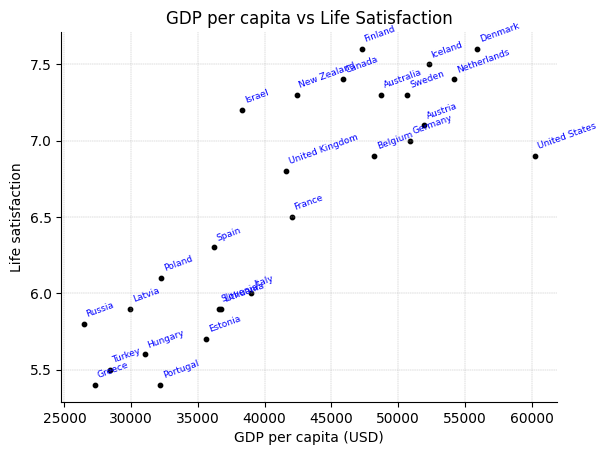

In [5]:
plt.scatter(lifesat['GDP per capita (USD)'], lifesat['Life satisfaction'], s=10, alpha=1, color="Black")
for i, row in lifesat.iterrows():
    plt.annotate(row['Country'], (row['GDP per capita (USD)'], row['Life satisfaction']),
                 xytext=(1, 5), textcoords='offset points', fontsize=6.5, color="Blue", rotation=20)

plt.xlabel('GDP per capita (USD)')
plt.ylabel('Life satisfaction')
plt.title('GDP per capita vs Life Satisfaction')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.grid(True, linestyle='--', linewidth=0.3)
plt.show()

In [6]:
lifesat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               27 non-null     object 
 1   GDP per capita (USD)  27 non-null     float64
 2   Life satisfaction     27 non-null     float64
dtypes: float64(2), object(1)
memory usage: 776.0+ bytes


In order to predict the life statisfaction for country Cyprus using its GDP per capita $37,655

Training and running a Linear Reression model using Scikit-Learn

In [7]:
X = np.c_[lifesat["GDP per capita (USD)"]].reshape(-1, 1)
y = np.c_[lifesat["Life satisfaction"]].reshape(-1, 1)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression()

θ0=3.75, θ1=6.78e-05


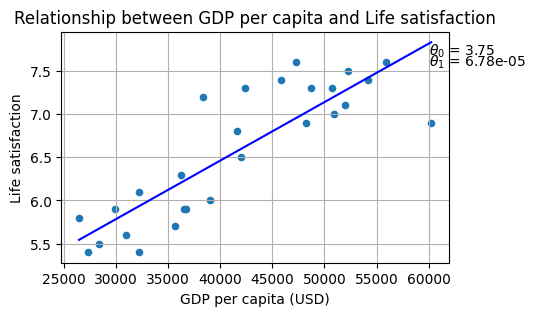

In [ ]:
t0, t1 = model.intercept_[0], model.coef_[0][0]
print(f"θ0={t0:.2f}, θ1={t1:.2e}")

lifesat.plot(kind='scatter', figsize=(5, 3), grid=True, x="GDP per capita (USD)", y="Life satisfaction")

X = np.linspace(lifesat["GDP per capita (USD)"].min(), lifesat["GDP per capita (USD)"].max(), 1000)
Y = t0 + t1 * X
plt.plot(X, Y, "b")
plt.text(0.95, 0.9, f"$\\theta_0$ = {t0:.2f}", transform=plt.gca().transAxes, fontsize=10, ha='left', color="black")
plt.text(0.95, 0.85, f"$\\theta_1$ = {t1:.2e}", transform=plt.gca().transAxes, fontsize=10, ha='left', color="black")
plt.xlabel("GDP per capita (USD)")
plt.ylabel("Life satisfaction")
plt.title("Relationship between GDP per capita and Life satisfaction")
plt.show()


In [ ]:
X_new = [[37_655.2]]
print(model.predict(X_new))

[[6.30165767]]


Training and running a KNN Regression model using Scikit-Learn

In [17]:
X = np.c_[lifesat["GDP per capita (USD)"]].reshape(-1, 1)
y = np.c_[lifesat["Life satisfaction"]].reshape(-1, 1)

from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=3)

model.fit(X, y)
X_new = [[37_655.2]]
print(model.predict(X_new))

[[6.33333333]]


We have predicted the life satisfaction of Cyprus to be 6.30 by linear regression model and 6.33 by KNN regression model.

In [8]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)

LinearRegression()

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly = PolynomialFeatures(degree=2, include_bias=False)  # Experiment with degree

# Transform features
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train a linear regression model on the transformed features
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [26]:
from sklearn.svm import SVR

model = SVR(kernel='linear', C=1.0)  # Adjust C as needed
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [27]:
for model in best_models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Model: {model.__class__.__name__}")
    print(f"Test MSE: {mse:.4f}")
    print(f"Test R-squared: {r2:.4f}")


Model: LinearRegression
Test MSE: 0.1955
Test R-squared: 0.3181
Model: SVR
Test MSE: 0.2900
Test R-squared: -0.0118


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
